In [1]:
#### Most recent analysis script for the performance of Pipeline3.0, aka SPHINX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import isochrone
%matplotlib notebook

*Isochrones Loaded V2.0*


In [65]:
#### Read SEGUE

SEGUE = pd.read_csv("/Users/MasterD/Google Drive/JPLUS/Pipeline3.0/data/catalogs/SEGUE_calibrated_catalog.csv")
print(SEGUE.columns)

Index(['SPSPEC', 'F395_int_n', 'F410_int_n', 'F430_int_n', 'F515_int_n',
       'F660_int_n', 'F861_int_n', 'g_int_n', 'i_int_n', 'r_int_n', 'u_int_n',
       'z_int_n', 'u_int', 'g_int', 'r_int', 'i_int', 'z_int', 'F395_int',
       'F410_int', 'F430_int', 'F515_int', 'F660_int', 'F861_int', 'gMag',
       'rMag', 'iMag', 'zMag', 'F395Mag', 'F410Mag', 'F430Mag', 'F515Mag',
       'F660Mag', 'F861Mag', 'gMag_Sigma', 'rMag_Sigma', 'iMag_Sigma',
       'zMag_Sigma', 'F395Mag_Sigma', 'F410Mag_Sigma', 'F430Mag_Sigma',
       'F515Mag_Sigma', 'F660Mag_Sigma', 'F861Mag_Sigma', 'SURVEY', 'RA',
       'DEC', 'TEFF_ADOP', 'TEFF_ADOP_ERR', 'TEFF_HA', 'TEFF_HD', 'TEFF_SPEC',
       'TEFF_IRFM', 'SPECTYPE_HAMMER', 'SPECTYPE_SUBCLASS', 'LOGG_ADOP',
       'LOGG_ADOP_N', 'LOGG_ADOP_ERR', 'LOGG_NGS2', 'LOGG_NGS2_UNC',
       'FEH_ADOP', 'FEH_ADOP_ERR', 'FEH_BIW', 'FEH_BIW_ERR', 'FEH_BIW_N',
       'CFE', 'CFE_GRID_ERR', 'CFE_FEH', 'CFE_FEH_ERR', 'CFE_FLAG', 'CFE_COR',
       'AFE', 'AFE_ERR', 'SNR'],

#### Read Target Output from SPHINX

In [85]:
target = pd.read_csv("../output/target_output.csv")
#training = pd.read_csv("../output/teff_training.csv")
#original = pd.read_csv("/Users/MasterD/Google Drive/JPLUS/Pipeline3.0/Temperature/Datasets/EDR_testing_catalog.csv")
print(target.columns)
print("TEFF MAX:  ", max(target['TEFF_ADOP']))
print("TEFF MIN:  ", min(target['TEFF_ADOP']))

Index([u'CFE_COR', u'F395_int', u'F395_int_n', u'F410_int', u'F410_int_n',
       u'F430_int', u'F430_int_n', u'F515_int', u'F515_int_n', u'F660_int',
       ...
       u'FEH_NET_15', u'FEH_NET_16', u'FEH_NET_17', u'FEH_NET_18',
       u'FEH_NET_19', u'FEH_NET_20', u'FEH_NET_21', u'FEH_NET_22',
       u'FEH_NET_23', u'FEH_NET_24'],
      dtype='object', length=144)
('TEFF MAX:  ', 9240)
('TEFF MIN:  ', -9999)


In [82]:
target['TEFF']

KeyError: 'TEFF'

In [79]:
#### Metallicity Result

<IPython.core.display.Javascript object>


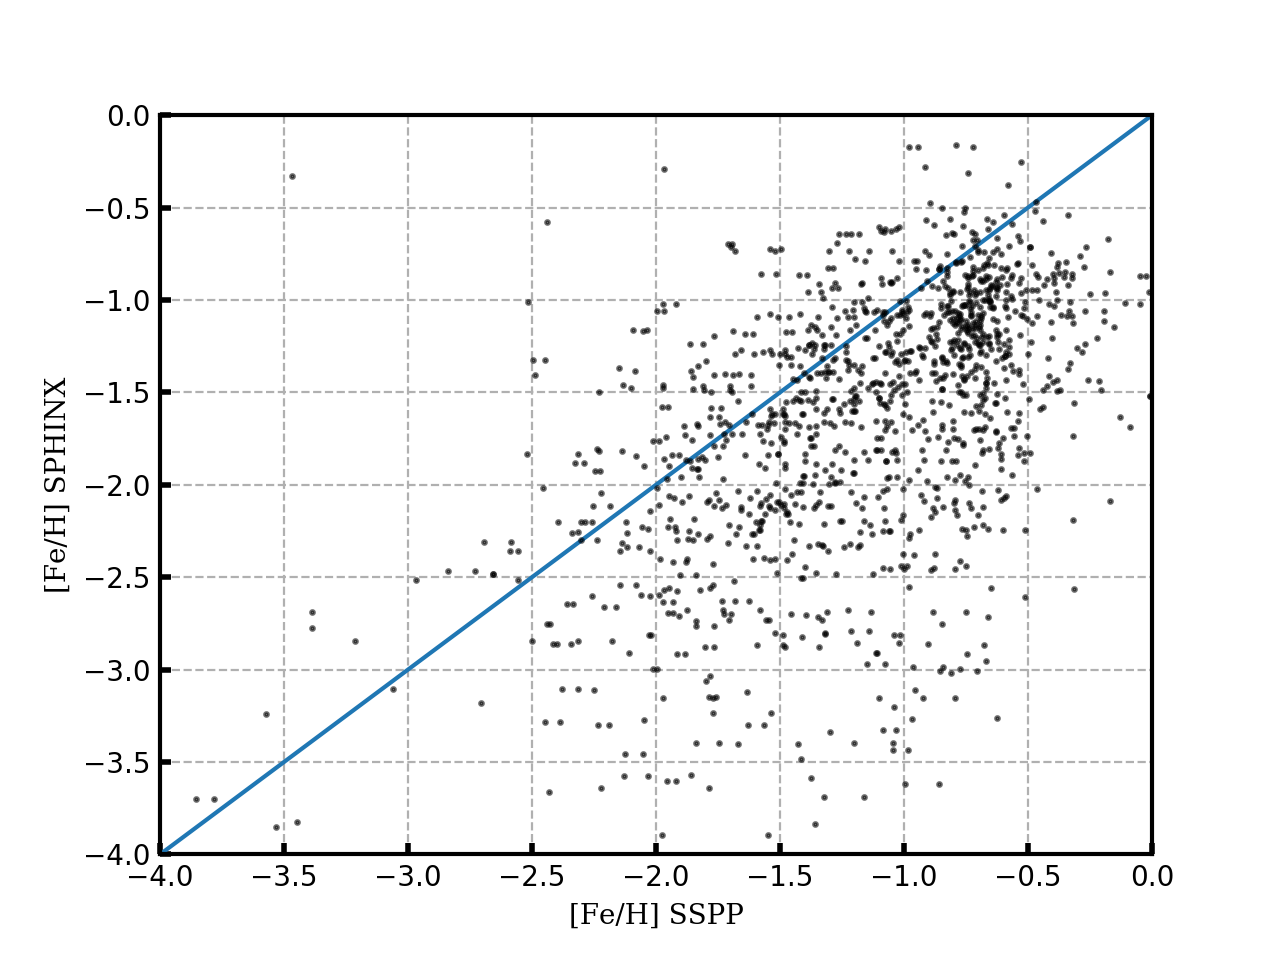

In [86]:
fig = plt.figure()
NETS = ['FEH_NET_0', 'FEH_NET_1', 'FEH_NET_2', 'FEH_NET_3', 'FEH_NET_4', 'FEH_NET_5',
       'FEH_NET_6', 'FEH_NET_7', 'FEH_NET_8', 'FEH_NET_9', 'FEH_NET_10', 'FEH_NET_11', 'FEH_NET_12',
       'FEH_NET_13', 'FEH_NET_14']
plt.grid(linestyle="--", zorder=0)
f_span = np.linspace(-4, 0, 100)

#[plt.scatter(target['FEH_BIW'], target[name], s=0.75, alpha=0.25, zorder=3) for name in NETS]
plt.scatter(x=target['FEH_BIW'], y=target['NET_FEH'],s=2, alpha=0.55, color="black", zorder=3)

plt.plot(f_span, f_span)
plt.xlim([-4, 0])
plt.ylim([-4, 0])

plt.tick_params(direction="in", width=2, length=4)

plt.xlabel("[Fe/H] SSPP", family="Serif", fontname="Courier")
plt.ylabel("[Fe/H] SPHINX", family="Serif", fontname="Courier")

#### Temperature Results

<IPython.core.display.Javascript object>


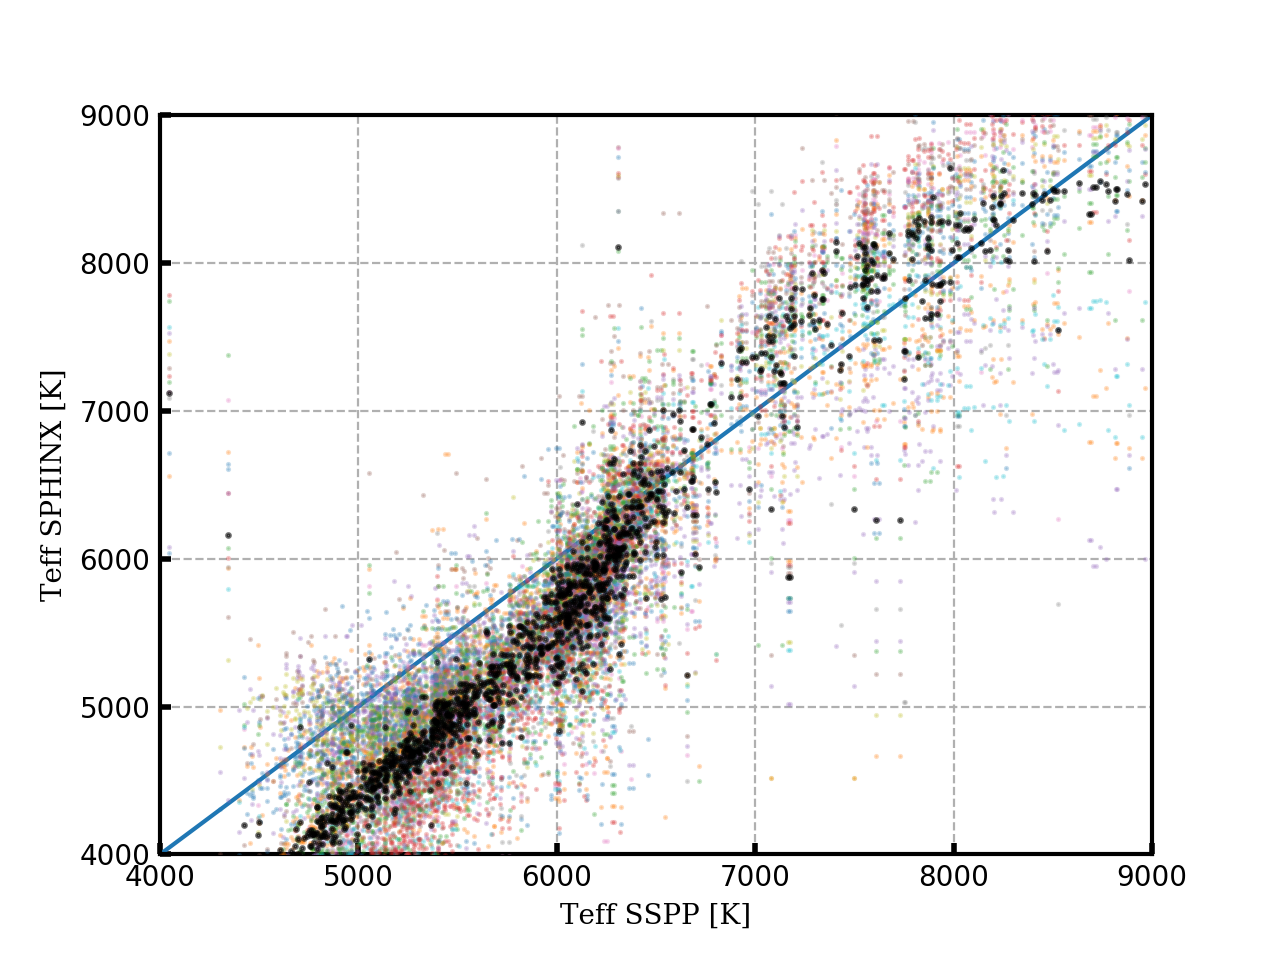

In [87]:
fig = plt.figure()
NETS = ['TEFF_NET_0', 'TEFF_NET_1', 'TEFF_NET_2', 'TEFF_NET_3', 'TEFF_NET_4', 'TEFF_NET_5',
       'TEFF_NET_6', 'TEFF_NET_7', 'TEFF_NET_8', 'TEFF_NET_9', 'TEFF_NET_10', 'TEFF_NET_11', 'TEFF_NET_12',
       'TEFF_NET_13', 'TEFF_NET_14']
plt.grid(linestyle="--", zorder=0)
t_span = np.linspace(4000, 9000, 100)

[plt.scatter(target['TEFF_ADOP'], target[name], s=0.75, alpha=0.25, zorder=3) for name in NETS]
plt.scatter(x=target['TEFF_ADOP'], y=target['NET_TEFF'],s=2, alpha=0.55, color="black", zorder=3)

plt.plot(t_span, t_span)
plt.xlim([4000, 9000])
plt.ylim([4000, 9000])

plt.tick_params(direction="in", width=2, length=4)

plt.xlabel("Teff SSPP [K]", family="Serif", fontname="Courier")
plt.ylabel("Teff SPHINX [K]", family="Serif", fontname="Courier")


<IPython.core.display.Javascript object>


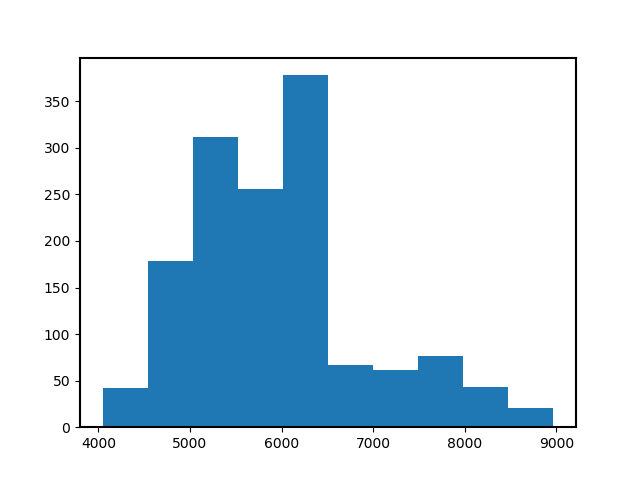

In [83]:
fig = plt.figure()

original_cut= original[original['TEFF_ADOP'].between(4000, 9000, inclusive=True)]
plt.hist(original_cut['TEFF_ADOP'])

plt.show()

In [8]:
teff_training = pd.read_csv("../output/teff_training_result.csv")
teff_verification = pd.read_csv("../output/teff_verification_result.csv")
teff_target = pd.read_csv("../output/teff_target_result.csv")

feh_training = pd.read_csv("../output/feh_training_result.csv")
feh_verification = pd.read_csv("../output/feh_verification_result.csv")
feh_target = pd.read_csv("../output/feh_target_result.csv")


print(teff_target.columns)

Index(['RA', 'DEC', 'uJAVA', 'uJAVA_sig', 'rSDSS', 'rSDSS_sig', 'F861',
       'J0861_sig', 'F660', 'J0660_sig', 'F515', 'J0515_sig', 'F430',
       'J0430_sig', 'F410', 'J0410_sig', 'J0378', 'J0378_sig', 'gSDSS',
       'gSDSS_sig', 'iSDSS', 'iSDSS_sig', 'F395', 'J0395_sig', 'NET_TEFF'],
      dtype='object')


In [4]:
def gr_bv(bv):
    return 1.02*bv - 0.22

def g_BV_V(bv, Mv):
    return Mv + 0.60*bv - 0.1

<IPython.core.display.Javascript object>


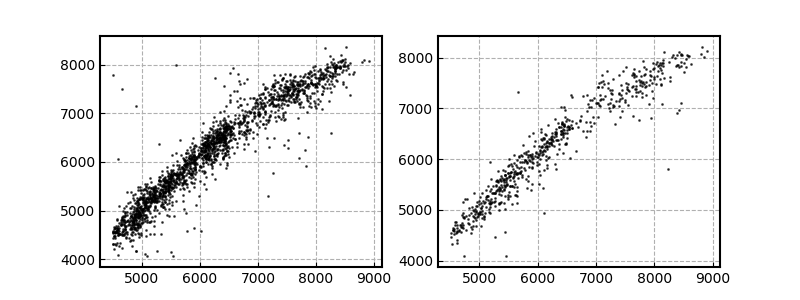

[None, None]

In [6]:
fig, ax = plt.subplots(1,2, figsize=(8,3))

ax[0].scatter(teff_training["TEFF"], teff_training["NET_TEFF"], s=1, alpha=0.65, color="black", zorder=3)
ax[1].scatter(teff_verification['TEFF'], teff_verification["NET_TEFF"], s=1,alpha=0.65, color="black", zorder=3)

[label.grid(linestyle="--", zorder=0) for label in ax]
[label.tick_params(direction="in") for label in ax]

<IPython.core.display.Javascript object>


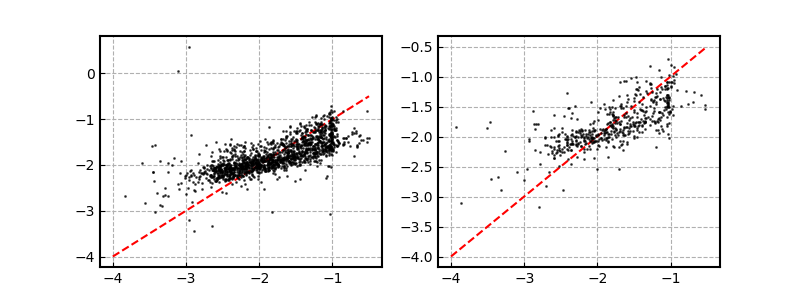

[None, None]

In [12]:
fig, ax = plt.subplots(1,2, figsize=(8,3))

feh_span = np.linspace(-4, -.5, 50)

ax[0].scatter(feh_training["FEH"], feh_training["NET_FEH"], s=1, alpha=0.65, color="black", zorder=3)
ax[1].scatter(feh_verification['FEH'], feh_verification["NET_FEH"], s=1,alpha=0.65, color="black", zorder=3)

[label.plot(feh_span, feh_span, linestyle="--", color="red") for label in ax]

[label.grid(linestyle="--", zorder=0) for label in ax]
[label.tick_params(direction="in") for label in ax]

<IPython.core.display.Javascript object>


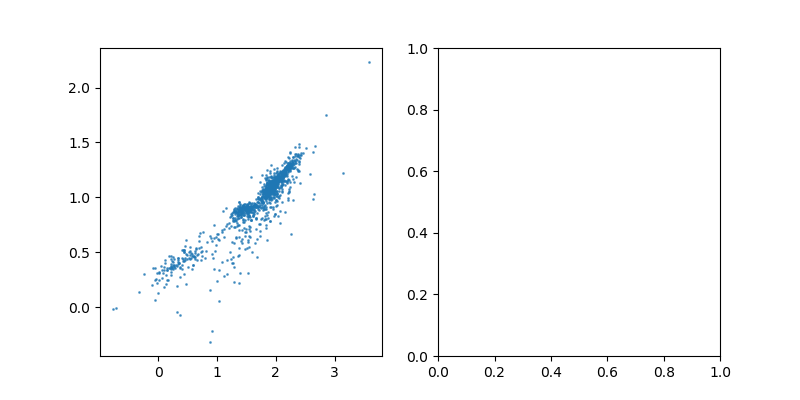

In [18]:
##### M15 Analysis

fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].scatter(target["uJAVA"] - target['rSDSS'], target["J0378"] - target["gSDSS"], s=1, alpha=0.65)
#ax[0].set_ylim([19, 14])

<IPython.core.display.Javascript object>


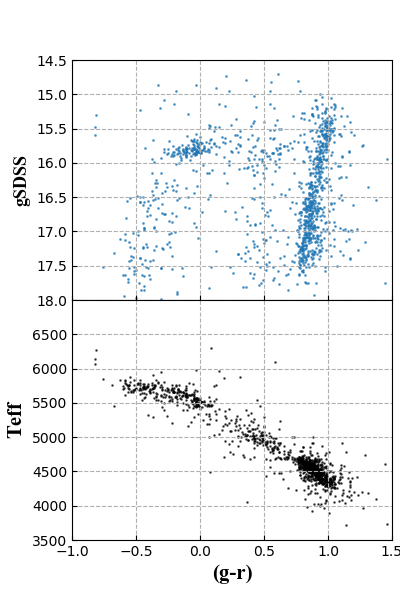

[None, None]

In [56]:
##### M15 Analysis

#fig, ax = plt.subplots(2,1, figsize=(4,8))

fig = plt.figure(figsize=(4,6))

axTOP = plt.axes([0.18, 0.5, 0.8, 0.4])
axBOT = plt.axes([0.18, 0.1, 0.8, 0.4], sharex=axTOP)
handle = [axTOP, axBOT]

axTOP.scatter(target["gSDSS"] - target['iSDSS'], target["gSDSS"], s=1, alpha=0.65)

axBOT.scatter(target['gSDSS'] - target['iSDSS'], target["NET_TEFF"],  
              color="black", s=0.75, alpha=0.65)

axTOP.set_ylim([18, 14.5])
axBOT.set_ylim([3500, 7000])

axTOP.set_ylabel("gSDSS", fontname="Times New Roman", fontsize=13)

axBOT.set_xlabel("(g-r)", fontname="Times New Roman", fontsize=15)
axBOT.set_ylabel("Teff", fontname="Times New Roman", fontsize=15)

plt.setp(axTOP.get_xticklabels(), visible=False)
axBOT.set_yticks(np.arange(3500, 7000, 500))
axTOP.set_xlim([-1.0, 1.5])
axBOT.set_xlim([-1.0, 1.5])

[label.grid(linestyle="--", zorder=0) for label in handle]

[label.tick_params(direction="in") for label in handle]

In [105]:
PHOTO_INPUTS = ['F410', 'F430', 'F515', 'F660', 'F861', 'gSDSS', 'rSDSS', 'iSDSS']

<IPython.core.display.Javascript object>


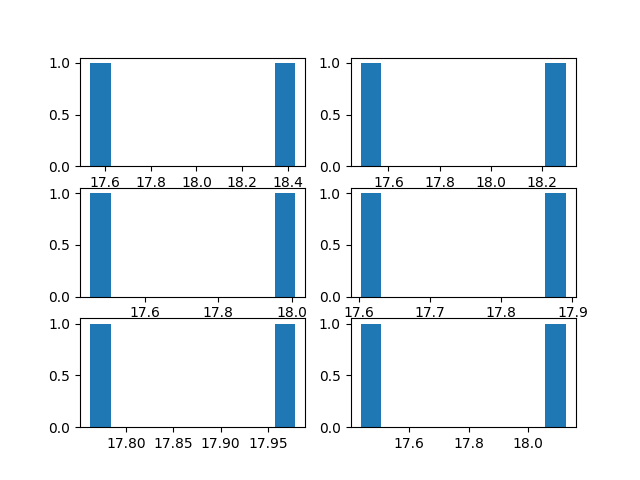

In [106]:
fig,ax = plt.subplots(3,2)
ax[0,0].hist(outliers['F410Mag'])
ax[0,1].hist(outliers['F430Mag'])

ax[1,0].hist(outliers['F515Mag'])
ax[1,1].hist(outliers['F660Mag'])

ax[2,0].hist(outliers['F861Mag'])
ax[2,1].hist(outliers['gMag'])

plt.show()

In [107]:
print(np.median(outliers.SNR))

27.25


In [108]:
zip(outliers.SPSPEC, outliers.NET_TEFF, outliers.TEFF_ADOP, outliers.T_DISP)

[('2788-54553-0018', 6387.3761733472693, 4511, 0.0),
 ('5154-55864-0195', 7742.8550711486732, 4707, 4.5)]

In [109]:
outliers[outliers.SPSPEC == "4549-55556-0018"]

,F410,F430,F515,F660,F861,SPEC_ELO,SPEC_HAM,SPSPEC,TEFF,T_DISP,...,FEH_BIW_N,CFE,CFE_GRID_ERR,CFE_FEH,CFE_FEH_ERR,CFE_FLAG,CFE_COR,AFE,AFE_ERR,SNR


#### Write out bad spectra

In [110]:
### I don't want to overwrite the previous bad_spectra
previous = pd.read_csv("../performance/bad_spectra.csv")
all_spec = np.concatenate((np.array(previous['SPSPEC']), np.array(outliers['SPSPEC'])))
print all_spec
pd.DataFrame({"SPSPEC":np.unique(all_spec)}).to_csv("../performance/bad_spectra.csv", index=False)

['1251-52964-0443' '1252-52970-0454' '1252-52970-0554' '1253-52974-0130'
 '1253-52974-0134' '1253-52974-0454' '2300-53682-0052' '2300-53682-0326'
 '2517-54567-0581' '2535-54632-0576' '2611-54477-0042' '2680-54141-0153'
 '2680-54141-0373' '2812-54639-0402' '2812-54639-0443' '2812-54639-0523'
 '2872-54533-0535' '2918-54554-0432' '3121-54749-0191' '3172-54863-0196'
 '3609-55201-0082' '3983-55603-0180' '4187-55693-0578' '4194-55450-0174'
 '4720-55691-0160' '4860-55691-0994' '6007-56066-0054' '2788-54553-0018'
 '5154-55864-0195']


In [111]:
previous['SPSPEC']

0     1251-52964-0443
1     1252-52970-0454
2     1252-52970-0554
3     1253-52974-0130
4     1253-52974-0134
5     1253-52974-0454
6     2300-53682-0052
7     2300-53682-0326
8     2517-54567-0581
9     2535-54632-0576
10    2611-54477-0042
11    2680-54141-0153
12    2680-54141-0373
13    2812-54639-0402
14    2812-54639-0443
15    2812-54639-0523
16    2872-54533-0535
17    2918-54554-0432
18    3121-54749-0191
19    3172-54863-0196
20    3609-55201-0082
21    3983-55603-0180
22    4187-55693-0578
23    4194-55450-0174
24    4720-55691-0160
25    4860-55691-0994
26    6007-56066-0054
Name: SPSPEC, dtype: object